# Simple Room Simulation
Simulate simple shoebox rooms using the Image Source Model (ISM)

In [1]:
import pyroomacoustics as pra
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Create Simple Room

In [2]:
audio_dir = './audio/'

In [3]:
# Room dimensions, reverberation time, and material
room_dim = [10, 10, 10] # meters
max_order = 5
fs = 16000
material = pra.Material(energy_absorption='brickwork')

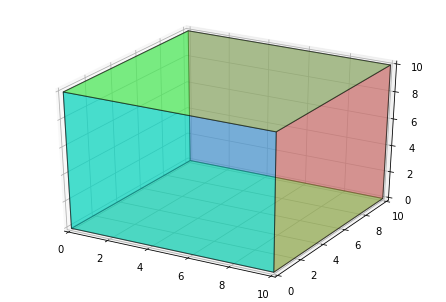

In [4]:
room = pra.ShoeBox(room_dim,fs=fs,max_order=max_order,materials=material)
fig, _ = room.plot()

## Add Sound Source and Microphone

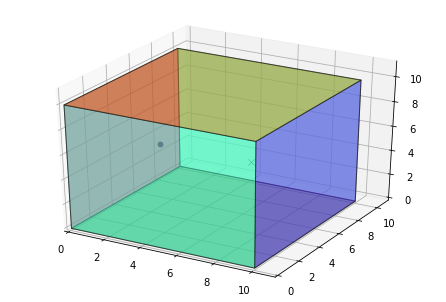

In [5]:
source_location = [2, 5, 5]
mic_location = [7, 5, 5]

room.add_source(source_location)
room.add_microphone(mic_location)

fig, ax = room.plot(mic_marker_size=40)
_ = ax.set_xlim([0, 11])
_ = ax.set_ylim([0, 11])
_ = ax.set_zlim([0, 11])

## Compute Image Source

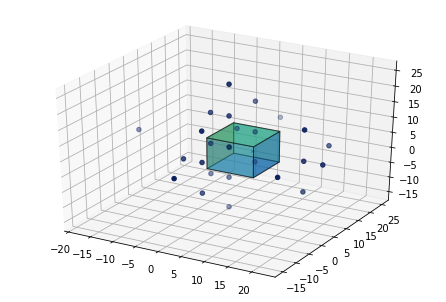

In [6]:
room.image_source_model()

fig, ax = room.plot(img_order=2)

In [7]:
print('Wall Material:')
print(material.energy_absorption)

Wall Material:
{'coeffs': array([0.01, 0.02, 0.02, 0.03, 0.03, 0.04, 0.04]), 'center_freqs': array([ 125.,  250.,  500., 1000., 2000., 4000., 8000.])}


## Compute Room Impluse Response

In [8]:
room.compute_rir()
rir = room.rir[0][0]

<Figure size 432x288 with 0 Axes>

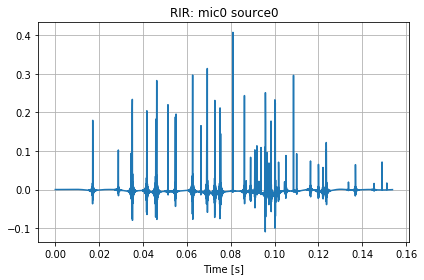

In [9]:
plt.figure()
room.plot_rir()
plt.grid()

## Compute RT60

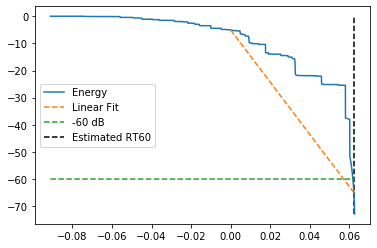

rt60 =  62.250000 ms


In [10]:
rt60 = pra.experimental.measure_rt60(rir,fs=room.fs,plot=True)
print(f'rt60 = {rt60*1000 : 0f} ms')

## Simulate Room Reverberation

Original Audio:


Simulated Room:


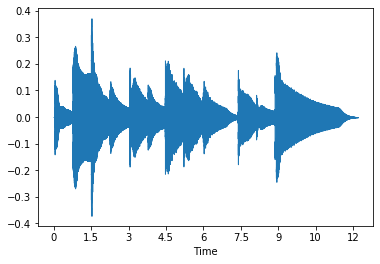

In [11]:
filename = 'Gt_Riff.wav'
path = audio_dir + filename

audio, _ = librosa.load(path=path,sr=fs,mono=True)
room.sources[0].signal=audio
room.simulate()

librosa.display.waveshow(audio,sr=fs)
org = ipd.Audio(audio,rate=fs)

simulation = room.mic_array.signals[0,:]
sim = ipd.Audio(simulation,rate=fs)

print('Original Audio:')
ipd.display(org)
print('Simulated Room:')
ipd.display(sim)

Original Audio:


Simulated Room:


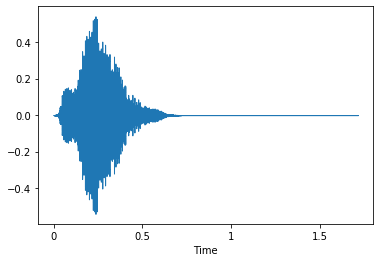

In [12]:
filename = 'wow.wav'
path = audio_dir + filename

audio, _ = librosa.load(path=path,sr=fs,mono=True)
room.sources[0].signal=audio
room.simulate()

librosa.display.waveshow(audio,sr=fs)
org = ipd.Audio(audio,rate=fs)

simulation = room.mic_array.signals[0,:]
sim = ipd.Audio(simulation,rate=fs)

print('Original Audio:')
ipd.display(org)
print('Simulated Room:')
ipd.display(sim)

# Hybrid Simulation Using ISM & Ray Tracing
Simulate early reflections using the image source model and late reflections using ray tracing

In [13]:
material2 = pra.Material(energy_absorption='reverb_chamber')

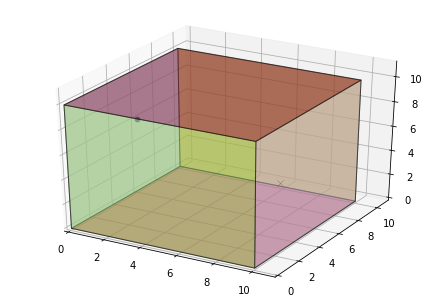

In [14]:
room_hybrid = pra.ShoeBox(
    room_dim,
    fs=fs,
    materials=material2,
    max_order=3,
    ray_tracing=True,
    air_absorption=True,
)
room_hybrid.set_ray_tracing()

source_location = [2, 3, 8]
mic_location = [8, 6, 3]

room_hybrid.add_source(source_location)
room_hybrid.add_microphone(mic_location)

fig, ax = room_hybrid.plot(mic_marker_size=40)
_ = ax.set_xlim([0, 11])
_ = ax.set_ylim([0, 11])
_ = ax.set_zlim([0, 11])

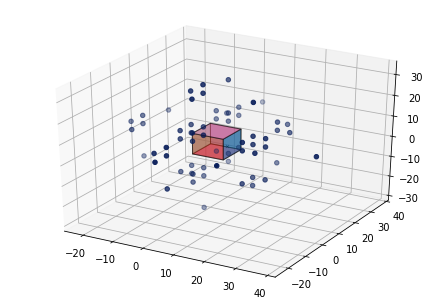

In [15]:
room_hybrid.image_source_model()

fig, ax = room_hybrid.plot(img_order=3)

In [16]:
print('Wall Material:')
print(material2.energy_absorption)

Wall Material:
{'coeffs': array([0.01, 0.01, 0.01, 0.02, 0.02, 0.04, 0.04]), 'center_freqs': array([ 125.,  250.,  500., 1000., 2000., 4000., 8000.])}


## Compute Room Impluse Response

<Figure size 432x288 with 0 Axes>

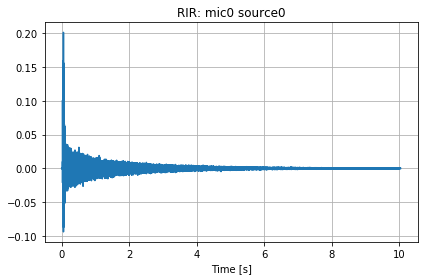

In [17]:
room_hybrid.set_ray_tracing(receiver_radius=0.5)
room_hybrid.compute_rir()
rir_hybrid = room_hybrid.rir[0][0]

plt.figure()
room_hybrid.plot_rir()
plt.grid()

## Compute RT60

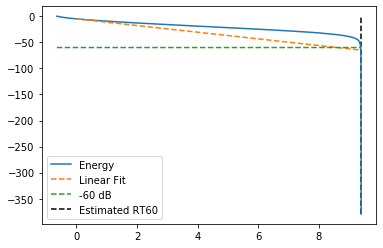

rt60 =  9376.687500 ms


In [18]:
rt60 = pra.experimental.measure_rt60(rir_hybrid,fs=room_hybrid.fs,plot=True)
print(f'rt60 = {rt60*1000 : 0f} ms')

## Simulate Room Reverberation

Original Audio:


Simulated Room:


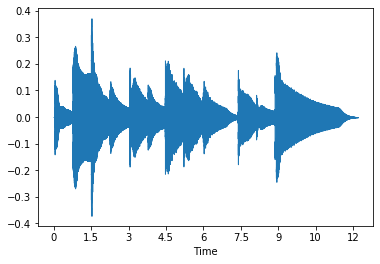

In [19]:
filename = 'Gt_Riff.wav'
path = audio_dir + filename

audio, _ = librosa.load(path=path,sr=fs,mono=True)
room_hybrid.sources[0].signal=audio
room_hybrid.simulate()

librosa.display.waveshow(audio,sr=fs)
org_hybrid = ipd.Audio(audio,rate=fs)

simulation = room_hybrid.mic_array.signals[0,:]
sim_hybrid = ipd.Audio(simulation,rate=fs)

print('Original Audio:')
ipd.display(org_hybrid)
print('Simulated Room:')
ipd.display(sim_hybrid)

Original Audio:


Simulated Room:


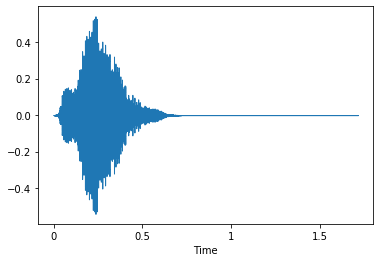

In [20]:
filename = 'wow.wav'
path = audio_dir + filename

audio, _ = librosa.load(path=path,sr=fs,mono=True)
room_hybrid.sources[0].signal=audio
room_hybrid.simulate()

librosa.display.waveshow(audio,sr=fs)
org_hybrid = ipd.Audio(audio,rate=fs)

simulation = room.mic_array.signals[0,:]
sim_hybrid = ipd.Audio(simulation,rate=fs)

print('Original Audio:')
ipd.display(org_hybrid)
print('Simulated Room:')
ipd.display(sim_hybrid)